In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ---------------- ----------------------- 1.6/4.0 MB 34.2 MB/s eta 0:00:01
     ---------------------------------------  4.0/4.0 MB 41.9 MB/s eta 0:00:01
     ---------------------------------------- 4.0/4.0 MB 36.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB 55.2 MB/s eta 0:00:49
     ---------------------------------------- 0.0/2.7 GB 55.4 MB/s eta 0:00:49
     ---------------------------------------- 0.0/2.7 GB 56.0 MB/s eta 0:00:48
     ---------------------------------------- 0.0/2.7 GB 54.7 MB/s eta 0:00:49
     ---------------------------------------- 0.0/2.7 GB 54.4 MB/s eta 0:00:49
     ---------------------------------------- 0.0/2.7 GB 59.5 MB/s eta 0:00:45
     ---------------------------------------- 0.0/2.7 GB 54.4 MB/s eta 0:00:49
     ----


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [307]:
pip install torchinfo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
print(torch.version)

<module 'torch.version' from 'C:\\Users\\Potato\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\torch\\version.py'>


In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader, Subset
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms

from sklearn.model_selection import train_test_split

import numpy as np
import os
from PIL import Image
import cv2
import random


In [3]:
torch.cuda.is_available()

True

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print("Current Device : {}".format(device))


Current Device : cuda


In [5]:
torch.cuda.get_device_name(device)

'NVIDIA GeForce RTX 3070'

In [5]:
torch.cuda.set_device(0)

In [6]:
torch.cuda.current_device()

0

In [7]:
# 시드 고정
def set_random_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = True
set_random_seed(7777)

In [8]:
# 파일 경로명 지정
file_dir = "./colab/colab/"

In [ ]:
# 최초 데이터셋 다운로드 시에만 실행!
# 이미 나눠져 있으면 바로 데이터 전처리로 이동
# 해당 폴더의 모든 파일 리스트
file_list = os.listdir(file_dir)
# 폴더명 제거
file_list.remove("o")
file_list.remove("x")
print(len(file_list))
#o x 분류, ListComprehension(리스트 안 for문)
o_files = [file for file in file_list if file.startswith("o_")]
x_files = [file for file in file_list if file.startswith("x_")]
len(o_files), len(x_files)

In [ ]:
# train, validation, test 데이터 나누기(sklearn)
o_train, o_test = train_test_split(o_files, test_size=0.2, random_state=42)
x_train, x_test = train_test_split(x_files, test_size=0.2, random_state=42)

In [ ]:
x_test[:10]

['x_91.png',
 'x_30.jpg',
 'x_68.png',
 'x_75.png',
 'x_59.png',
 'x_6.png',
 'x_118.jpg',
 'x_23.jpg',
 'x_108.jpg',
 'x_97.png']

In [12]:
# 파일 폴더별로 옮기기
train_o_dir = os.path.join(file_dir + "train/o/")
test_o_dir = os.path.join(file_dir + "test/o/")
train_x_dir = os.path.join(file_dir + "train/x/")
test_x_dir = os.path.join(file_dir + "test/x/")

for filename in o_train:
  os.rename(file_dir + filename, train_o_dir + filename)
for filename in o_test:
  os.rename(file_dir + filename, test_o_dir + filename)

for filename in x_train:
  os.rename(file_dir + filename, train_x_dir + filename)
for filename in x_test:
  os.rename(file_dir + filename, test_x_dir + filename)

NameError: name 'o_train' is not defined

In [9]:
# 데이터 전처리 및 DataSet 만들기
train_dir = os.path.join(file_dir + "train/")
test_dir = os.path.join(file_dir + "test/")

train_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    #transforms.Normalize((0.5,), (0.5,))
])

test_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(),
    transforms.ToTensor()
])

trainset = torchvision.datasets.ImageFolder(root = train_dir, transform = train_trans)
testset = torchvision.datasets.ImageFolder(root = test_dir, transform = test_trans)

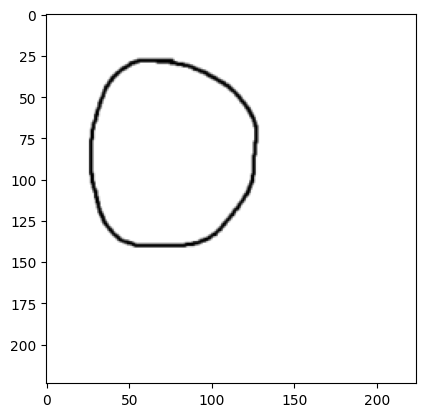

In [10]:
# 데이터셋 테스트
plt.imshow(transforms.ToPILImage()(trainset[0][0]), cmap='gray')

In [352]:
trainset[0][0]

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [11]:
# HyperParameter

n_batch = 16

In [12]:
# DataLoader 만들기

trainloader = DataLoader(trainset, batch_size = n_batch, shuffle = True)
testloader = DataLoader(testset, batch_size = n_batch, shuffle = False)

In [13]:
it = iter(trainloader)

클래스: ['o', 'x']
데이터셋 크기: 224


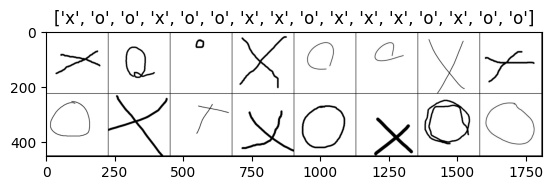

torch.Size([1, 224, 224])


In [14]:
img, label = next(it)
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    #mean = np.array([0.43303847, 0.4034577, 0.39415097])
    #std = np.array([0.18344551, 0.17549995, 0.1647388])
    #input = std * input + mean
    input = np.clip(input, 0, 1)

    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


class_names = trainset.classes
print('클래스:', class_names)

out = torchvision.utils.make_grid(img)
print('데이터셋 크기:', len(trainset))

imshow(out, title=[class_names[x] for x in label])
print(img[0].shape)

In [15]:
class MLP_1(nn.Module):
  def __init__(self):
    super(MLP_1, self).__init__()

    self.lr1 = nn.Linear(224*224, 64)
    self.lr2 = nn.Linear(64, 64)
    self.lr3 = nn.Linear(64, 2)
    self.relu = nn.ReLU()
    #self.dropout = nn.Dropout(0.15)


  def forward(self, x):
      x = torch.flatten(x, start_dim = 1)
      x = self.lr1(x)
      x = self.relu(x)
      x = self.lr2(x)
      x = self.relu(x)
      #x = self.dropout(x)
      x = self.lr3(x)

      x = F.log_softmax(x, dim=1)
      return x

In [16]:
from torchinfo import summary

m = MLP_1()
summary(m, (16, 1, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
MLP_1                                    [16, 2]                   --
├─Linear: 1-1                            [16, 64]                  3,211,328
├─ReLU: 1-2                              [16, 64]                  --
├─Linear: 1-3                            [16, 64]                  4,160
├─ReLU: 1-4                              [16, 64]                  --
├─Linear: 1-5                            [16, 2]                   130
Total params: 3,215,618
Trainable params: 3,215,618
Non-trainable params: 0
Total mult-adds (M): 51.45
Input size (MB): 3.21
Forward/backward pass size (MB): 0.02
Params size (MB): 12.86
Estimated Total Size (MB): 16.09

In [265]:
# nn.Linear 입력차원 계산 -> convolution layer 있을때만
imgs, labels = next(iter(trainloader))
m = nn.Sequential(
        nn.Flatten(),
        nn.Linear(224*224, 1024),
        nn.ReLU(),
        nn.Linear(1024, 512),
        nn.ReLU(),
        nn.Linear(512, 2),
        #nn.ReLU()
        )
out = m(imgs)
print(imgs.shape)
out.shape

torch.Size([16, 1, 224, 224])


torch.Size([16, 2])

In [17]:
# 정확도 산출 함수
def acc_fn(y_pred, y_true):
    accuracy = torch.eq(y_pred, y_true).sum().item()/len(y_pred)
    return accuracy

In [19]:
# Training

def train_loop(dataloader, model, loss_fn, optimizer, device):
  size = len(dataloader.dataset)
  model.train() # 학습 모드
  for batch, (X, y) in enumerate(dataloader):
  
    X, y = X.to(device), y.to(device)
    
    # 예측 오류 계산
    pred = model(X)
    loss = loss_fn(pred, y)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if batch % 4 == 0:
        #print(batch)
        loss, current = loss.item(), batch * batch_size + len(X)
        #print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn, device):
  model.eval() # 평가 모드
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, test_acc = 0.0,0.0
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      pred = model(X)


      test_loss += loss_fn(pred,y)
      test_acc += torch.sum(pred.argmax(axis=-1)==y).item()

    
    test_loss /= len(dataloader) #step 수로 나누기.
    test_acc /= len(dataloader.dataset) #총 데이터수로 나누기.

    test_loss = round(float(test_loss), 4)
    test_acc = round(float(test_acc), 4)
    #print(f"Test loss: {round(float(test_loss), 4)}, Test accuracy: {round(float(test_acc) * 100, 2)}%")
    return test_acc, test_loss

In [444]:
# (train - test 반복) * epochs
epochs = 400
learning_rate = 0.0001
loss = []
acc = []
model = MLP_1().to(device)
lf = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(epochs):
    #print(f"Epoch {t+1}\n-------------------------------")
    train_loop(trainloader, model, lf, opt, device)
    acc.append(test_loop(testloader, model, loss_fn, device))
print("종료.")

종료.


In [445]:
acc[:5]

[0.5, 0.5, 0.5, 0.5, 0.5]

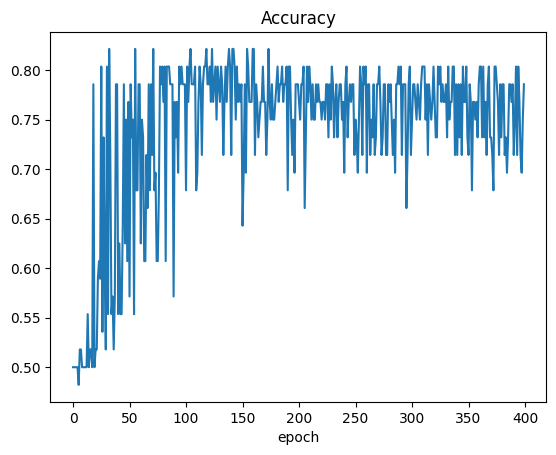

In [446]:
plt.plot(acc)
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

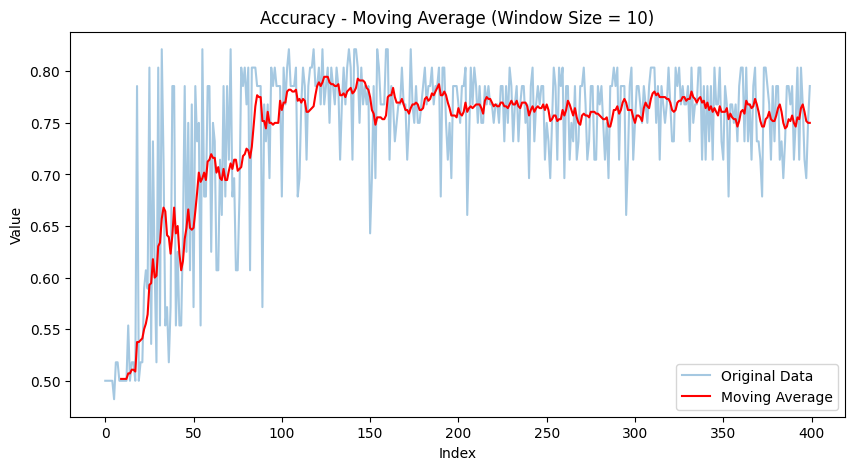

In [457]:
def moving_average(data, window_size):
    averages = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        window_average = sum(window) / window_size
        averages.append(window_average)
    return averages

def plot_moving_average(data, window_size):
    averages = moving_average(data, window_size)
    plt.figure(figsize=(10, 5))
    plt.plot(data, label='Original Data', alpha = 0.4)
    plt.plot(range(window_size - 1, len(data)), averages, label='Moving Average', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title(f'Accuracy - Moving Average (Window Size = {window_size})')
    plt.legend()
    plt.show()

plot_moving_average(acc, 10)

In [18]:
from sklearn.model_selection import KFold

In [ ]:
validation_loss = []
kfold = KFold(n_splits=5, shuffle=True)
criterion = nn.CrossEntropyLoss()
max_epoch = 400

for fold, (train_idx, val_idx) in enumerate(kfold.split(trainset)): # 위의 k-fold class 사용

    train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx) # index 생성
    val_subsampler = torch.utils.data.SubsetRandomSampler(val_idx) # index 생성

    # sampler를 이용한 DataLoader 정의
    trloader = torch.utils.data.DataLoader(trainset, batch_size=16, sampler=train_subsampler) # 해당하는 index 추출
    vloader = torch.utils.data.DataLoader(trainset, batch_size=16, sampler=val_subsampler)

    # 모델
    model = MLP_1().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # weight_decay=1e-7

    for epoch in range(max_epoch): # 400번 학습을 진행한다.

        for inputs, values in trloader:
            
            inputs, values = inputs.to(device), values.to(device)
            
            optimizer.zero_grad() # 최적화 초기화
            
            outputs = model(inputs) # 모델에 입력값 대입 후 예측값 산출
            loss = criterion(outputs, values) # 손실 함수 계산
            loss.backward() # 손실 함수 기준으로 역전파 설정
            optimizer.step() # 역전파를 진행하고 가중치 업데이트
        if(epoch % 100 == 0):
            print("epoch({} / {}) complete".format(epoch + 1, max_epoch))

            
    train_acc, train_loss = test_loop(trloader, model, criterion, device) # 학습 데이터의 RMSE
    val_acc, val_loss = test_loop(vloader, model, criterion, device)
    print("k-fold[", fold,"] Train Loss: %.4f, Validation Loss: %.4f" %(train_loss, val_loss))
    print("k-fold[", fold,"] Train acc: %.4f, Validation acc: %.4f" %(train_acc, val_acc))

    validation_loss.append(val_loss)

validation_loss = np.array(validation_loss)
mean = np.mean(validation_loss)
std = np.std(validation_loss)
print("Validation Score: %.4f, ± %.4f" %(mean, std))

epoch(1 / 400) complete
epoch(101 / 400) complete
epoch(201 / 400) complete
epoch(301 / 400) complete
k-fold[ 0 ] Train Loss: 0.6836, Validation Loss: 0.7043
k-fold[ 0 ] Train acc: 0.4241, Validation acc: 0.0848
epoch(1 / 400) complete
